In [3]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.3 MB 791 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


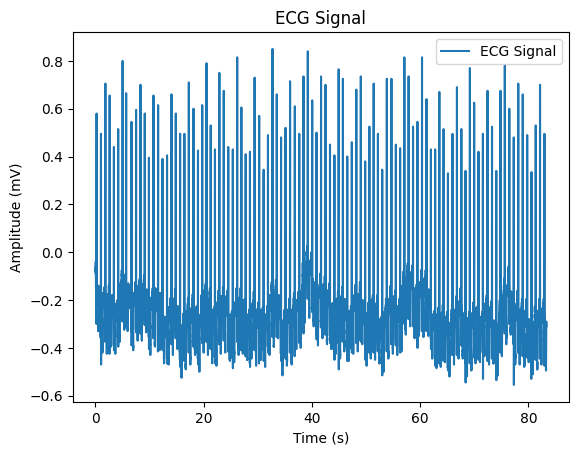

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram, welch, butter, filtfilt

# Charger les données
filename = "/Users/verdianeouattara/Downloads/ECG_long_360Hz.txt"  # Remplacez par le nom de votre fichier
data = np.loadtxt(filename)

# Paramètres du signal
fs = 360  # Fréquence d'échantillonnage en Hz
t = np.arange(len(data)) / fs  # Temps en secondes

# Visualiser le signal
plt.figure()
plt.plot(t, data, label="ECG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.title("ECG Signal")
plt.legend()
plt.show()



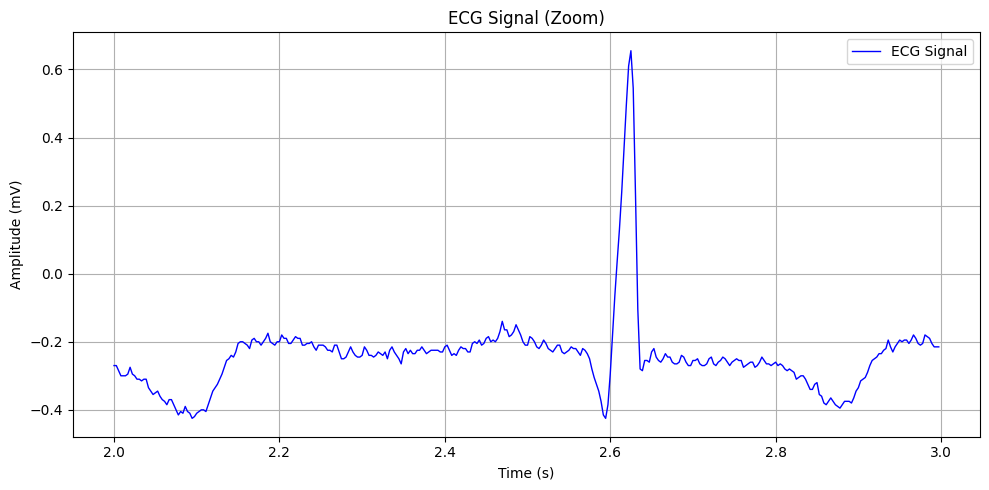

In [8]:
# Paramètres du signal
fs = 360  # Fréquence d'échantillonnage en Hz
t = np.arange(len(data)) / fs  # Temps en secondes

# Sélectionner une portion plus petite du signal pour mieux voir les pics
start_time = 2  # Début en secondes
end_time = 3   # Fin en secondes
start_index = int(start_time * fs)
end_index = int(end_time * fs)

t_subset = t[start_index:end_index]
data_subset = data[start_index:end_index]

# Visualiser le signal avec un zoom
plt.figure(figsize=(10, 5))  # Taille de la figure
plt.plot(t_subset, data_subset, label="ECG Signal", color="blue", linewidth=1)  # Ligne plus fine
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.title("ECG Signal (Zoom)")
plt.grid(True)  # Ajouter une grille pour une meilleure lisibilité
plt.legend()
plt.tight_layout()  # Ajuster automatiquement l'affichage
plt.show()

Calcul de la fréquence de Shannon et de la résolution fréquentielle



In [9]:
# Fréquence de Shannon
f_shannon = fs / 2
print(f"Fréquence de Shannon : {f_shannon} Hz")

# Résolution fréquentielle
resolution = 1 / (len(data) / fs)
print(f"Résolution fréquentielle : {resolution:.3f} Hz")


Fréquence de Shannon : 180.0 Hz
Résolution fréquentielle : 0.012 Hz


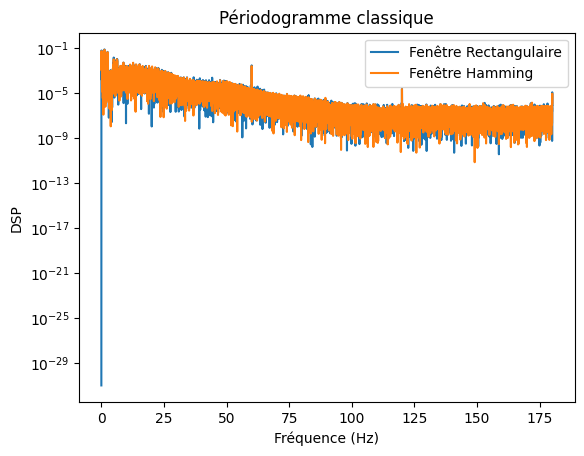

In [10]:
f_rect, Pxx_rect = periodogram(data, fs=fs, window="boxcar")
f_hamming, Pxx_hamming = periodogram(data, fs=fs, window="hamming")

# Affichage
plt.figure()
plt.semilogy(f_rect, Pxx_rect, label="Fenêtre Rectangulaire")
plt.semilogy(f_hamming, Pxx_hamming, label="Fenêtre Hamming")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("DSP")
plt.title("Périodogramme classique")
plt.legend()
plt.show()


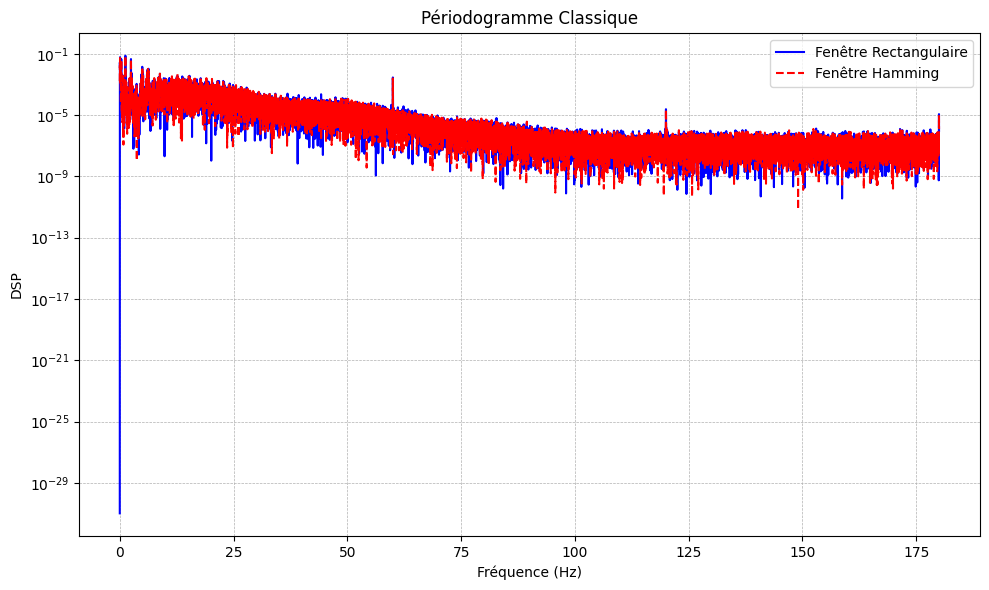

In [11]:
# Calcul des périodogrammes
f_rect, Pxx_rect = periodogram(data, fs=fs, window="boxcar")
f_hamming, Pxx_hamming = periodogram(data, fs=fs, window="hamming")

# Affichage des périodogrammes
plt.figure(figsize=(10, 6))
plt.semilogy(f_rect, Pxx_rect, label="Fenêtre Rectangulaire", color="blue", linestyle="-", linewidth=1.5)
plt.semilogy(f_hamming, Pxx_hamming, label="Fenêtre Hamming", color="red", linestyle="--", linewidth=1.5)

plt.xlabel("Fréquence (Hz)")
plt.ylabel("DSP")
plt.title("Périodogramme Classique")
plt.legend(loc="upper right")  # Placer la légende en haut à droite
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Ajouter une grille discrète
plt.tight_layout()  # Ajuster les marges pour un affichage optimal
plt.show()

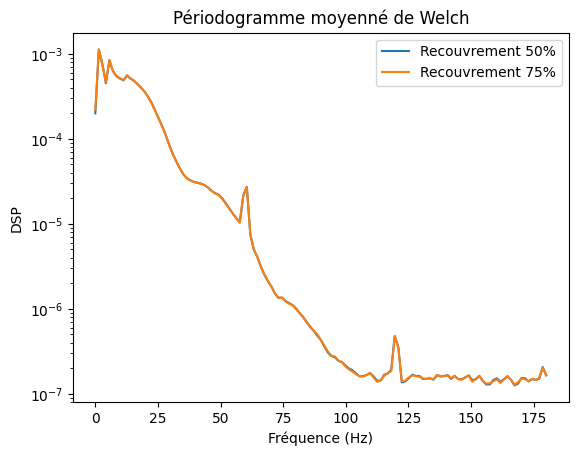

In [12]:
f_welch_50, Pxx_welch_50 = welch(data, fs=fs, nperseg=256, noverlap=128)
f_welch_75, Pxx_welch_75 = welch(data, fs=fs, nperseg=256, noverlap=192)

# Affichage
plt.figure()
plt.semilogy(f_welch_50, Pxx_welch_50, label="Recouvrement 50%")
plt.semilogy(f_welch_75, Pxx_welch_75, label="Recouvrement 75%")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("DSP")
plt.title("Périodogramme moyenné de Welch")
plt.legend()
plt.show()


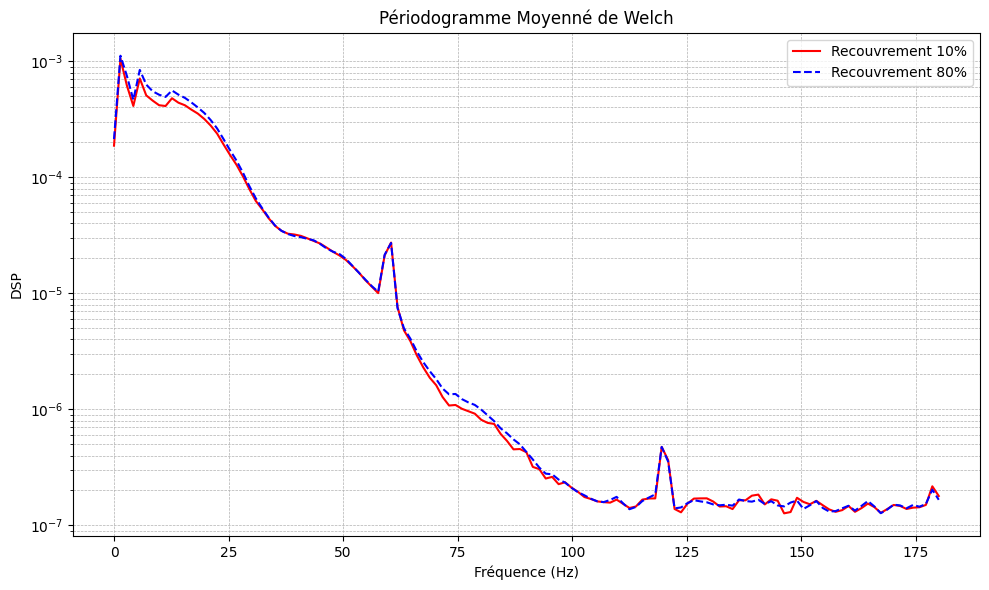

In [16]:
# Périodogramme de Welch avec 30% et 75% de recouvrement
nperseg = 256  # Taille de la fenêtre

noverlap_30 = int(0.1 * nperseg)  # 30% de recouvrement
f_welch_30, Pxx_welch_30 = welch(data, fs=fs, nperseg=nperseg, noverlap=noverlap_30)

noverlap_75 = int(0.8 * nperseg)  # 75% de recouvrement
f_welch_75, Pxx_welch_75 = welch(data, fs=fs, nperseg=nperseg, noverlap=noverlap_75)

# Affichage des deux périodogrammes
plt.figure(figsize=(10, 6))
plt.semilogy(f_welch_30, Pxx_welch_30, label="Recouvrement 10%", color="red", linestyle="-", linewidth=1.5)
plt.semilogy(f_welch_75, Pxx_welch_75, label="Recouvrement 80%", color="blue", linestyle="--", linewidth=1.5)

plt.xlabel("Fréquence (Hz)")
plt.ylabel("DSP")
plt.title("Périodogramme Moyenné de Welch")
plt.legend(loc="upper right")  # Position de la légende
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Grille discrète
plt.tight_layout()  # Ajustement des marges
plt.show()

In [17]:
# Fréquences maximales
f_max_rect = f_rect[np.argmax(Pxx_rect)]
f_max_hamming = f_hamming[np.argmax(Pxx_hamming)]

# Fréquences médianes
f_median_rect = f_rect[np.cumsum(Pxx_rect) >= np.sum(Pxx_rect) / 2][0]
f_median_hamming = f_hamming[np.cumsum(Pxx_hamming) >= np.sum(Pxx_hamming) / 2][0]

print(f"Fréquence maximale (Rectangulaire): {f_max_rect} Hz")
print(f"Fréquence médiane (Rectangulaire): {f_median_rect} Hz")
print(f"Fréquence maximale (Hamming): {f_max_hamming} Hz")
print(f"Fréquence médiane (Hamming): {f_median_hamming} Hz")


Fréquence maximale (Rectangulaire): 1.2359999999999998 Hz
Fréquence médiane (Rectangulaire): 7.547999999999999 Hz
Fréquence maximale (Hamming): 1.2359999999999998 Hz
Fréquence médiane (Hamming): 7.043999999999999 Hz


Fréquence maximale (10% recouvrement) : 1.41 Hz
Fréquence médiane (10% recouvrement)  : 11.25 Hz
Fréquence maximale (80% recouvrement) : 1.41 Hz
Fréquence médiane (80% recouvrement)  : 11.25 Hz


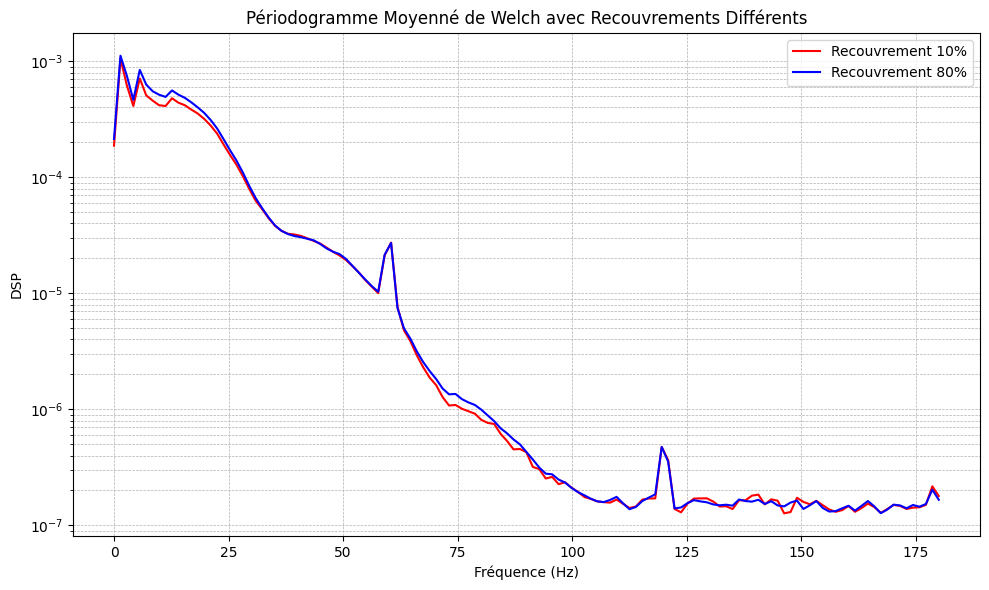

In [19]:


# Charger les données
filename = "/Users/verdianeouattara/Downloads/ECG_long_360Hz.txt"  # Remplacez par le nom de votre fichier
data = np.loadtxt(filename)

# Paramètres du signal
fs = 360  # Fréquence d'échantillonnage en Hz

# Périodogramme de Welch avec 10% et 80% de recouvrement
nperseg = 256  # Taille de la fenêtre

noverlap_10 = int(0.1 * nperseg)  # 10% de recouvrement
f_welch_10, Pxx_welch_10 = welch(data, fs=fs, nperseg=nperseg, noverlap=noverlap_10)

noverlap_80 = int(0.8 * nperseg)  # 80% de recouvrement
f_welch_80, Pxx_welch_80 = welch(data, fs=fs, nperseg=nperseg, noverlap=noverlap_80)

# Calcul des fréquences maximales (DSP maximale)
f_max_10 = f_welch_10[np.argmax(Pxx_welch_10)]
f_max_80 = f_welch_80[np.argmax(Pxx_welch_80)]

# Calcul des fréquences médianes (divisant l'énergie spectrale en deux parties égales)
def compute_median_frequency(frequencies, power_spectral_density):
    cumulative_energy = np.cumsum(power_spectral_density)
    total_energy = cumulative_energy[-1]
    median_frequency = frequencies[np.where(cumulative_energy >= total_energy / 2)[0][0]]
    return median_frequency

f_median_10 = compute_median_frequency(f_welch_10, Pxx_welch_10)
f_median_80 = compute_median_frequency(f_welch_80, Pxx_welch_80)

# Résultats
print(f"Fréquence maximale (10% recouvrement) : {f_max_10:.2f} Hz")
print(f"Fréquence médiane (10% recouvrement)  : {f_median_10:.2f} Hz")
print(f"Fréquence maximale (80% recouvrement) : {f_max_80:.2f} Hz")
print(f"Fréquence médiane (80% recouvrement)  : {f_median_80:.2f} Hz")

# Affichage des spectres pour visualisation
plt.figure(figsize=(10, 6))
plt.semilogy(f_welch_10, Pxx_welch_10, label="Recouvrement 10%", color="red")
plt.semilogy(f_welch_80, Pxx_welch_80, label="Recouvrement 80%", color="blue")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("DSP")
plt.title("Périodogramme Moyenné de Welch avec Recouvrements Différents")
plt.legend(loc="upper right")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


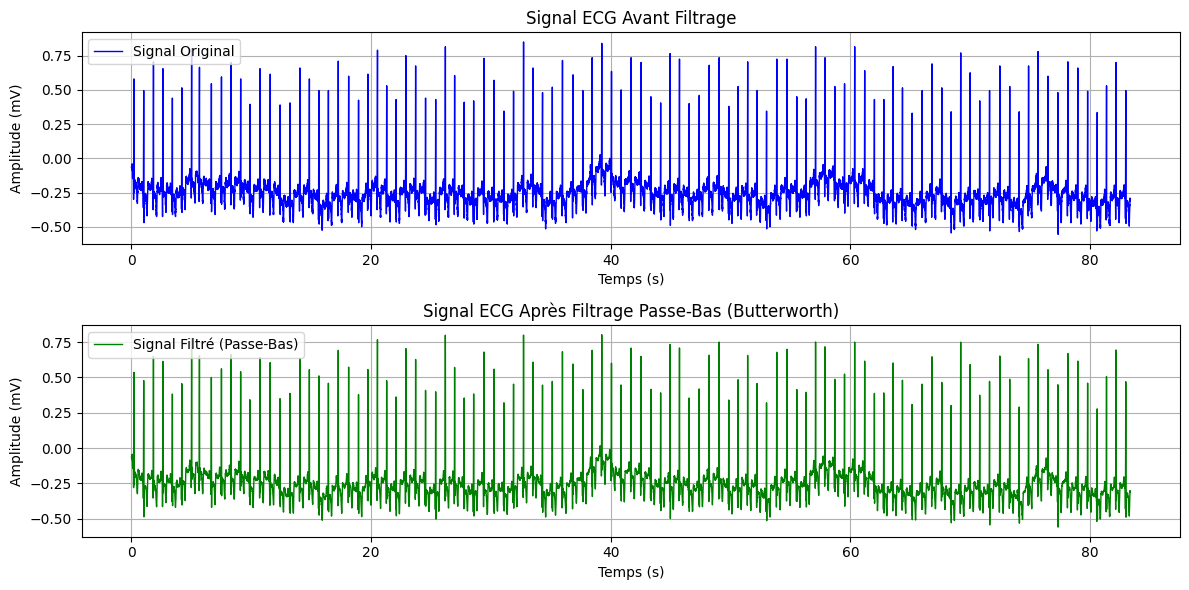

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Charger les données
filename = "/Users/verdianeouattara/Downloads/ECG_long_360Hz.txt"  # Remplacez par le nom de votre fichier
data = np.loadtxt(filename)

# Paramètres du signal
fs = 360  # Fréquence d'échantillonnage en Hz
t = np.arange(len(data)) / fs  # Temps en secondes

# Conception du filtre passe-bas de Butterworth
fc = 50 # Fréquence de coupure en Hz (choisie pour les raisons ci-dessus)
order = 4  # Ordre du filtre
b, a = butter(order, fc / (fs / 2), btype='low')

# Appliquer le filtre au signal
data_filtered = filtfilt(b, a, data)

# Affichage comparatif avant et après filtrage
plt.figure(figsize=(12, 6))

# Signal original
plt.subplot(2, 1, 1)
plt.plot(t, data, label="Signal Original", color="blue", linewidth=1)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.title("Signal ECG Avant Filtrage")
plt.grid(True)
plt.legend()

# Signal filtré
plt.subplot(2, 1, 2)
plt.plot(t, data_filtered, label="Signal Filtré (Passe-Bas)", color="green", linewidth=1)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.title("Signal ECG Après Filtrage Passe-Bas (Butterworth)")
plt.grid(True)
plt.legend()

plt.tight_layout()  # Ajuste les marges pour éviter le chevauchement
plt.show()


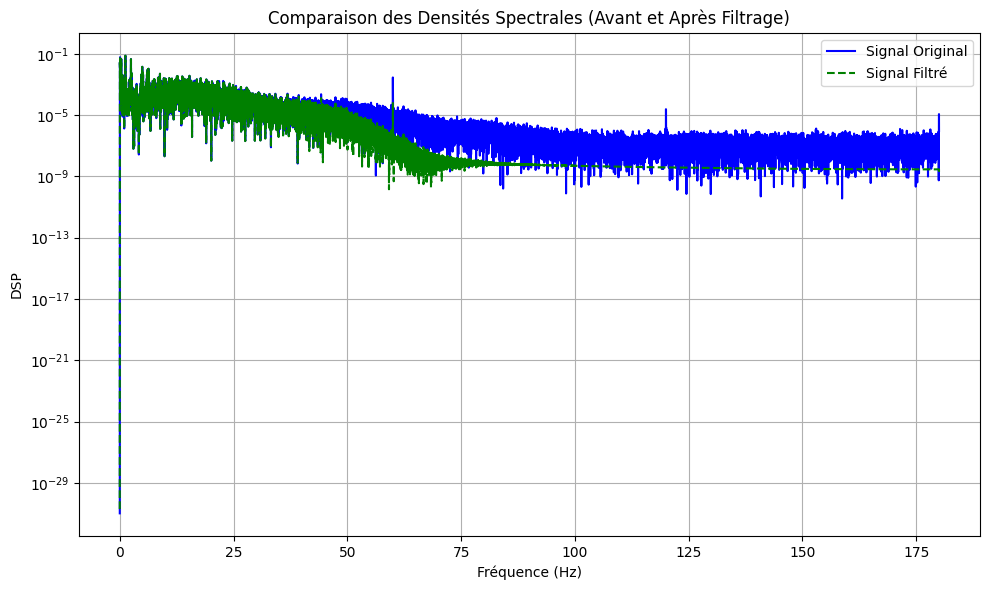

In [28]:

# Analyse fréquentielle avant et après filtrage
f, Pxx_original = periodogram(data, fs=fs)
f_filtered, Pxx_filtered = periodogram(data_filtered, fs=fs)

plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx_original, label="Signal Original", color="blue")
plt.semilogy(f_filtered, Pxx_filtered, label="Signal Filtré", color="green", linestyle="--")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("DSP")
plt.title("Comparaison des Densités Spectrales (Avant et Après Filtrage)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


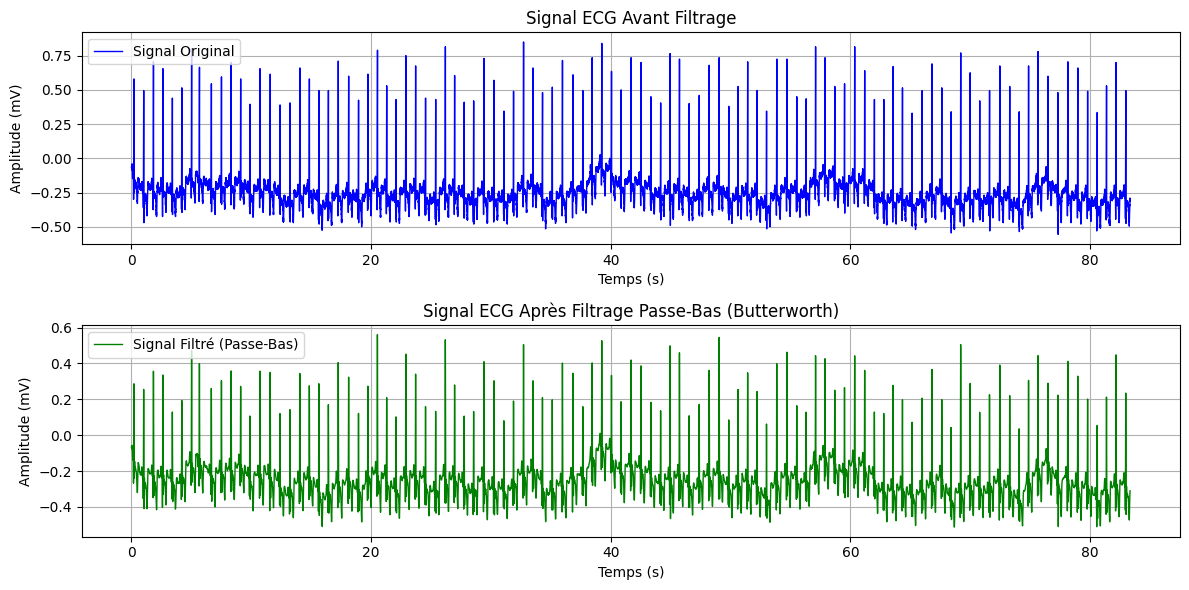

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Charger les données
filename = "/Users/verdianeouattara/Downloads/ECG_long_360Hz.txt"  # Remplacez par le nom de votre fichier
data = np.loadtxt(filename)

# Paramètres du signal
fs = 360  # Fréquence d'échantillonnage en Hz
t = np.arange(len(data)) / fs  # Temps en secondes

# Conception du filtre passe-bas de Butterworth
fc = 20 # Fréquence de coupure en Hz (choisie pour les raisons ci-dessus)
order = 6  # Ordre du filtre
b, a = butter(order, fc / (fs / 2), btype='low')

# Appliquer le filtre au signal
data_filtered = filtfilt(b, a, data)

# Affichage comparatif avant et après filtrage
plt.figure(figsize=(12, 6))

# Signal original
plt.subplot(2, 1, 1)
plt.plot(t, data, label="Signal Original", color="blue", linewidth=1)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.title("Signal ECG Avant Filtrage")
plt.grid(True)
plt.legend()

# Signal filtré
plt.subplot(2, 1, 2)
plt.plot(t, data_filtered, label="Signal Filtré (Passe-Bas)", color="green", linewidth=1)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.title("Signal ECG Après Filtrage Passe-Bas (Butterworth)")
plt.grid(True)
plt.legend()

plt.tight_layout()  # Ajuste les marges pour éviter le chevauchement
plt.show()


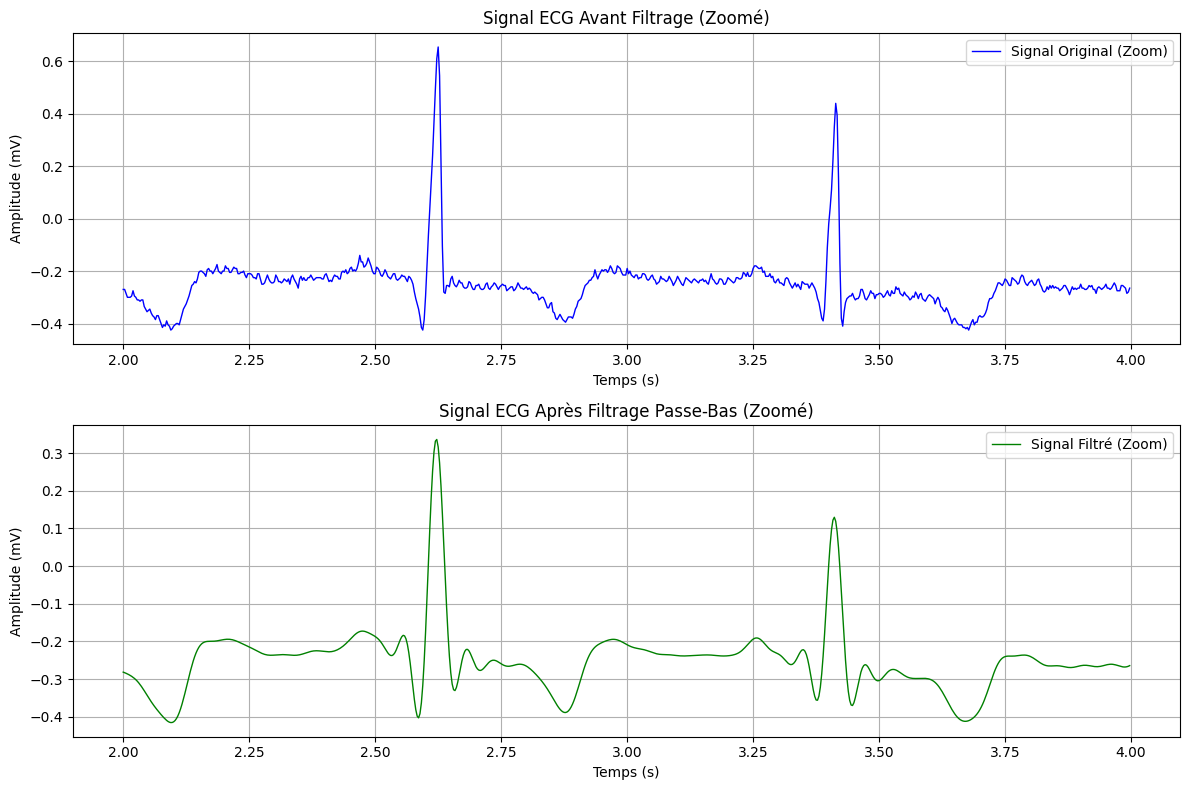

In [33]:
start_time = 2  # Début du zoom en secondes
end_time = 4    # Fin du zoom en secondes
start_index = int(start_time * fs)
end_index = int(end_time * fs)

t_zoom = t[start_index:end_index]
data_zoom = data[start_index:end_index]
data_filtered_zoom = data_filtered[start_index:end_index]

plt.figure(figsize=(12, 8))

# Signal original (zoomé)
plt.subplot(2, 1, 1)
plt.plot(t_zoom, data_zoom, label="Signal Original (Zoom)", color="blue", linewidth=1)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.title("Signal ECG Avant Filtrage (Zoomé)")
plt.grid(True)
plt.legend()

# Signal filtré (zoomé)
plt.subplot(2, 1, 2)
plt.plot(t_zoom, data_filtered_zoom, label="Signal Filtré (Zoom)", color="green", linewidth=1)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.title("Signal ECG Après Filtrage Passe-Bas (Zoomé)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


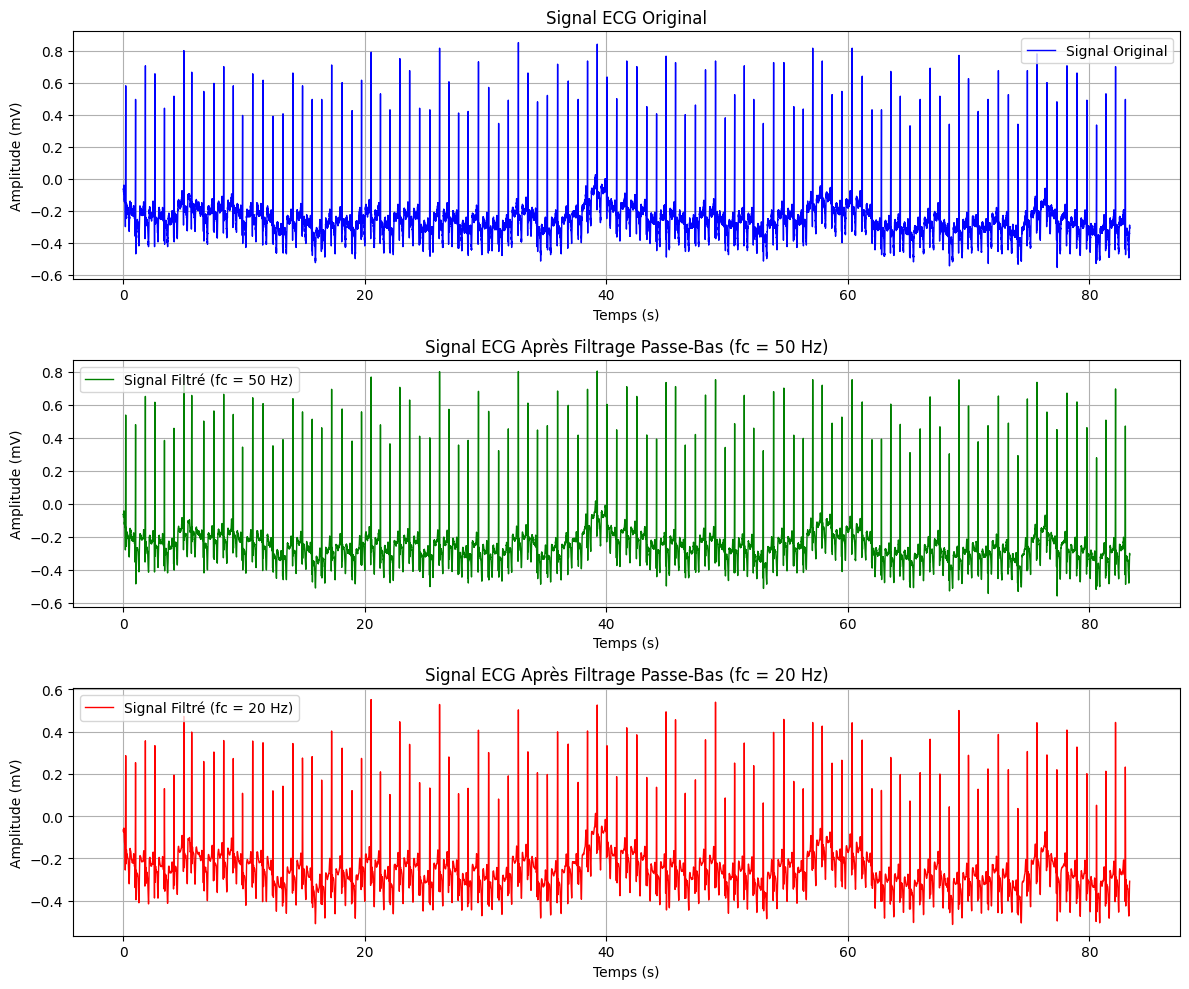

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Charger les données
filename = "/Users/verdianeouattara/Downloads/ECG_long_360Hz.txt"  # Remplacez par le chemin de votre fichier
data = np.loadtxt(filename)

# Paramètres du signal
fs = 360  # Fréquence d'échantillonnage en Hz
t = np.arange(len(data)) / fs  # Temps en secondes

# Conception des filtres Butterworth
fc_50 = 50  # Fréquence de coupure à 50 Hz
fc_20 = 20  # Fréquence de coupure à 20 Hz
order = 4   # Ordre du filtre

# Filtre pour fc = 50 Hz
b_50, a_50 = butter(order, fc_50 / (fs / 2), btype='low')
data_filtered_50 = filtfilt(b_50, a_50, data)

# Filtre pour fc = 20 Hz
b_20, a_20 = butter(order, fc_20 / (fs / 2), btype='low')
data_filtered_20 = filtfilt(b_20, a_20, data)

# Affichage comparatif avant et après filtrage
plt.figure(figsize=(12, 10))

# Signal original
plt.subplot(3, 1, 1)
plt.plot(t, data, label="Signal Original", color="blue", linewidth=1)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.title("Signal ECG Original")
plt.grid(True)
plt.legend()

# Signal filtré avec fc = 50 Hz
plt.subplot(3, 1, 2)
plt.plot(t, data_filtered_50, label="Signal Filtré (fc = 50 Hz)", color="green", linewidth=1)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.title("Signal ECG Après Filtrage Passe-Bas (fc = 50 Hz)")
plt.grid(True)
plt.legend()

# Signal filtré avec fc = 20 Hz
plt.subplot(3, 1, 3)
plt.plot(t, data_filtered_20, label="Signal Filtré (fc = 20 Hz)", color="red", linewidth=1)
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.title("Signal ECG Après Filtrage Passe-Bas (fc = 20 Hz)")
plt.grid(True)
plt.legend()

plt.tight_layout()  # Ajuste les marges pour éviter les chevauchements
plt.show()
